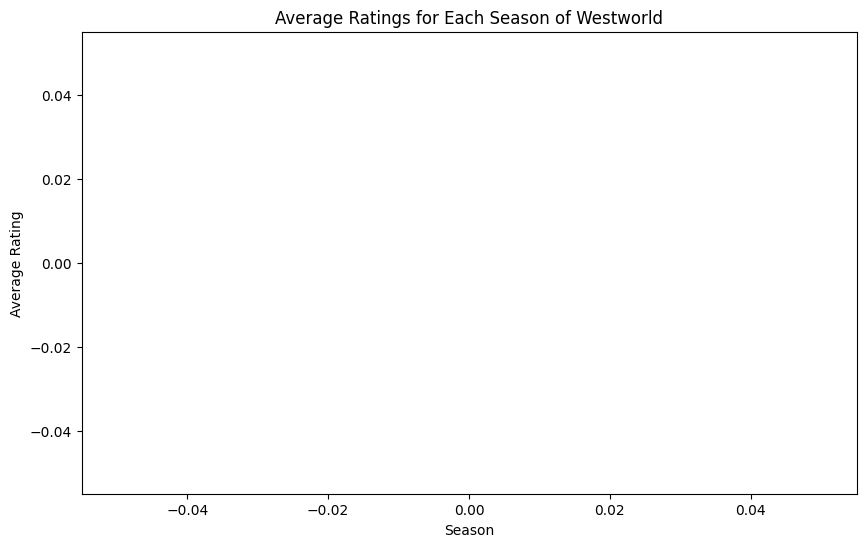

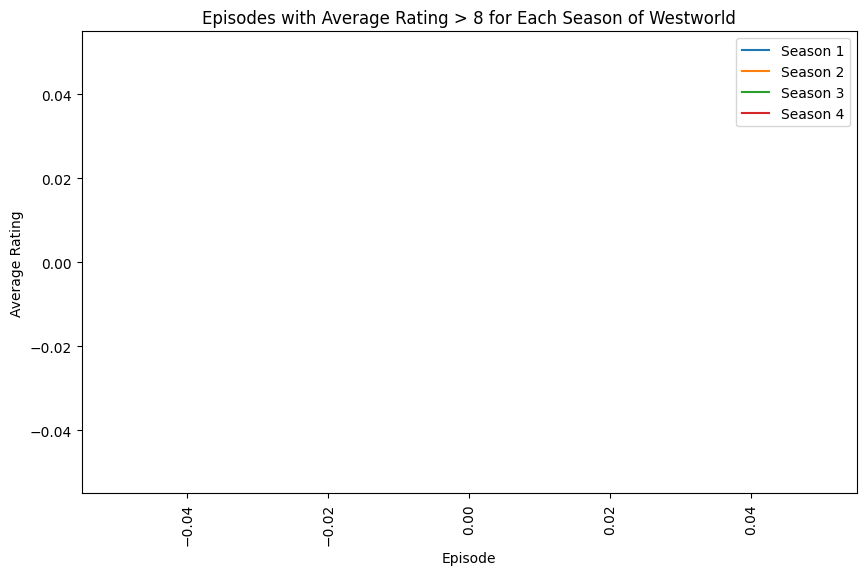

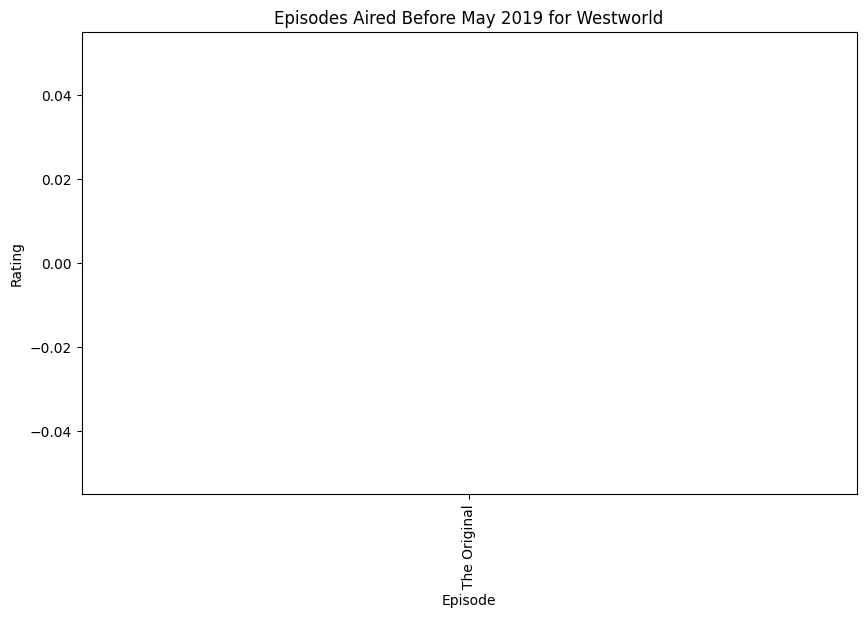

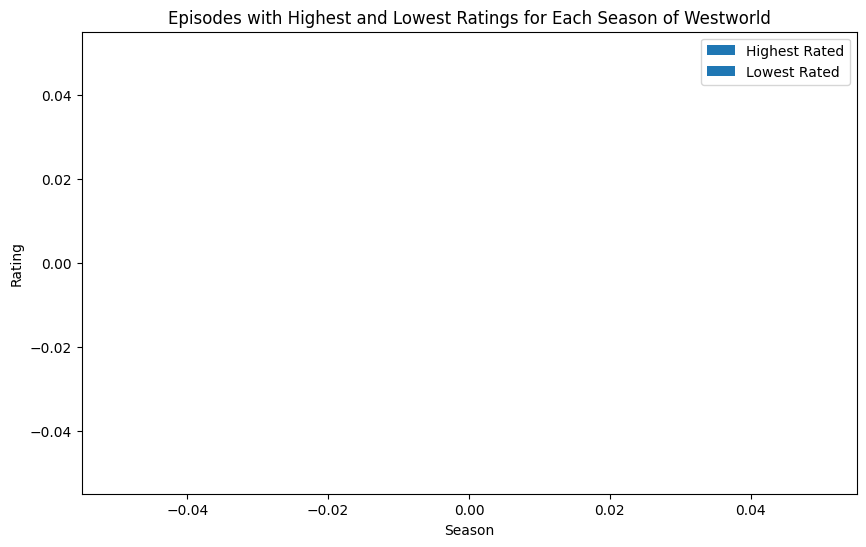

Most Popular Episodes:


In [21]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# Download the TV show data from the link
url = 'http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes'
response = requests.get(url)
data = response.json()

# Extract the show information and episode details
show_name = data['name']
episodes = data['_embedded']['episodes']

# Create a pandas DataFrame from the episode data
df = pd.DataFrame(episodes)

# Convert the airdate column to datetime
df['airdate'] = pd.to_datetime(df['airdate'])

# Convert the 'rating' column to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Get all the overall ratings for each season and plot the ratings for all seasons
season_ratings = df.groupby('season')['rating'].mean()
seasons = season_ratings.index
ratings = season_ratings.values

plt.figure(figsize=(10, 6))
plt.bar(seasons, ratings)
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Each Season of {}'.format(show_name))
plt.show()

# Get all the episode names with average rating more than 8 for every season and plot visualization
high_rated_episodes = df.groupby(['season', 'name']).agg({'rating': 'mean'})
high_rated_episodes = high_rated_episodes[high_rated_episodes['rating'] > 8]

plt.figure(figsize=(10, 6))
high_rated_episodes_reset = high_rated_episodes.reset_index()

for season in seasons:
    season_episodes = high_rated_episodes_reset.loc[high_rated_episodes_reset['season'] == season]
    plt.plot(season_episodes.index, season_episodes['rating'], label='Season {}'.format(season))

plt.xlabel('Episode')
plt.ylabel('Average Rating')
plt.title('Episodes with Average Rating > 8 for Each Season of {}'.format(show_name))
plt.legend()
plt.xticks(rotation=90)
plt.show()


# Get all the episode names that aired before May 2019 and plot visualization
before_2019_episodes = df[df['airdate'] < pd.Timestamp('2019-05-01')]

plt.figure(figsize=(10, 6))
plt.bar(before_2019_episodes['name'], before_2019_episodes['rating'])
plt.xlabel('Episode')
plt.ylabel('Rating')
plt.title('Episodes Aired Before May 2019 for {}'.format(show_name))
plt.xticks(rotation=90)
plt.show()

# Get the episode name with the highest and lowest rating for each season and plot visualization
highest_rated_episodes = df.groupby('season')['rating'].idxmax()
lowest_rated_episodes = df.groupby('season')['rating'].idxmin()

plt.figure(figsize=(10, 6))
df_reset = df.reset_index()

highest_rated_episodes_filtered = highest_rated_episodes.dropna()
lowest_rated_episodes_filtered = lowest_rated_episodes.dropna()

plt.bar(df_reset.loc[highest_rated_episodes_filtered, 'season'], df_reset.loc[highest_rated_episodes_filtered, 'rating'], color='green', label='Highest Rated')
plt.bar(df_reset.loc[lowest_rated_episodes_filtered, 'season'], df_reset.loc[lowest_rated_episodes_filtered, 'rating'], color='red', label='Lowest Rated')
plt.xlabel('Season')
plt.ylabel('Rating')
plt.title('Episodes with Highest and Lowest Ratings for Each Season of {}'.format(show_name))
plt.legend()
plt.show()




most_popular_episodes_filtered = most_popular_episodes.dropna()
most_popular_episodes_summary = df.loc[most_popular_episodes_filtered, ['season', 'name', 'summary']]

print('Most Popular Episodes:')
for index, row in most_popular_episodes_summary.iterrows():
    print('Season {}: Episode Name - {}\nSummary: {}\n'.format(row['season'], row['name'], row['summary']))


